In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readImage2Gray(im_path):
    '''
    receive the image path and return the image in gray scale 
    /'''
    im = cv2.imread(im_path)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im_gray

In [3]:
def detecFaces(im_path, scaleFactor, minNeighbors):
    '''
    receives a image, convert to gray scale and detect faces
    using Haar Cascade classifier
    return an array with the detected faces (x, y, w, h)
    '''
    
    classifier = cv2.CascadeClassifier('../resources/classifiers/haarcascade_frontalface_default.xml')
    
    im_gray = readImage2Gray(im_path)
    faces = classifier.detectMultiScale(im_gray, scaleFactor, minNeighbors)
    
    return faces

In [4]:
def drawRect(im_path, faces):
    '''
    receive the image path and the detected faces
    return the image with yellow rectangles on the detected faces 
    '''
    image_withFaces = cv2.imread(im_path)
    image_withFaces = cv2.cvtColor(image_withFaces, cv2.COLOR_BGR2RGB)
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(image_withFaces, (x,y), (x+w, y+h), (255, 255, 0), 4)
    else:
        print('No face detected!!!')
    
    return plt.imshow(image_withFaces)
                  

In [5]:
def saveFaces(im_path, faces, imageNumber):
    '''
    receive the image path, the detected faces and the image number to correct save in the HD
    '''
    image_withFaces = cv2.imread(im_path)
    image_idx = 0

    for (x,y,w,h) in faces:
        image_idx += 1
        image_roi = image_withFaces[y:y+h, x:x+w]        
        cv2.imwrite('Aula1_Exercise_Pic' + str(imageNumber) + '_face_' + str(image_idx) + '.png', image_roi)
    

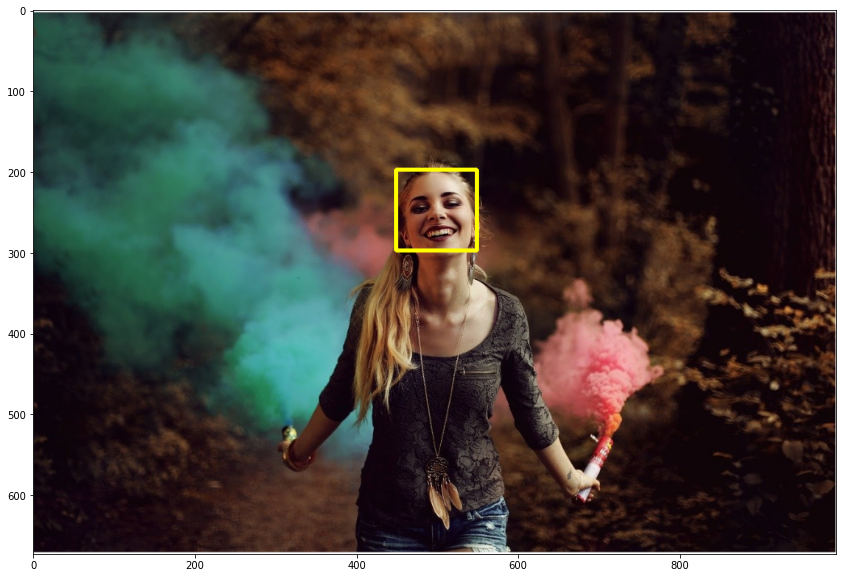

In [6]:
faces1 = detecFaces('../resources/pics/Exercise_Aula1_pic1.png', 1.3, 5)

plt.figure(figsize=(15,10))
drawRect('../resources/pics/Exercise_Aula1_pic1.png', faces1)

saveFaces('../resources/pics/Exercise_Aula1_pic1.png', faces1, 1)

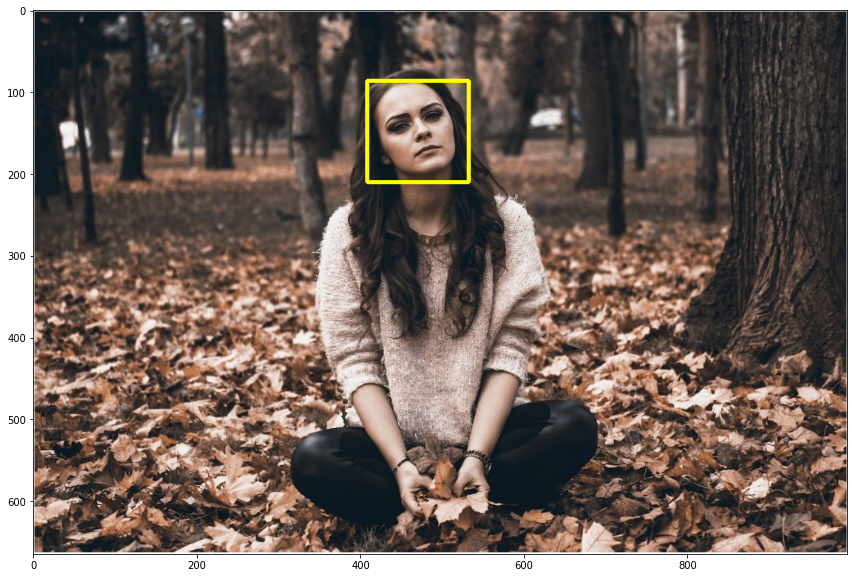

In [7]:
faces2 = detecFaces('../resources/pics/Exercise_Aula1_pic2.png', 1.3, 5)

plt.figure(figsize=(15,10))
drawRect('../resources/pics/Exercise_Aula1_pic2.png', faces2)

saveFaces('../resources/pics/Exercise_Aula1_pic2.png', faces2, 2)

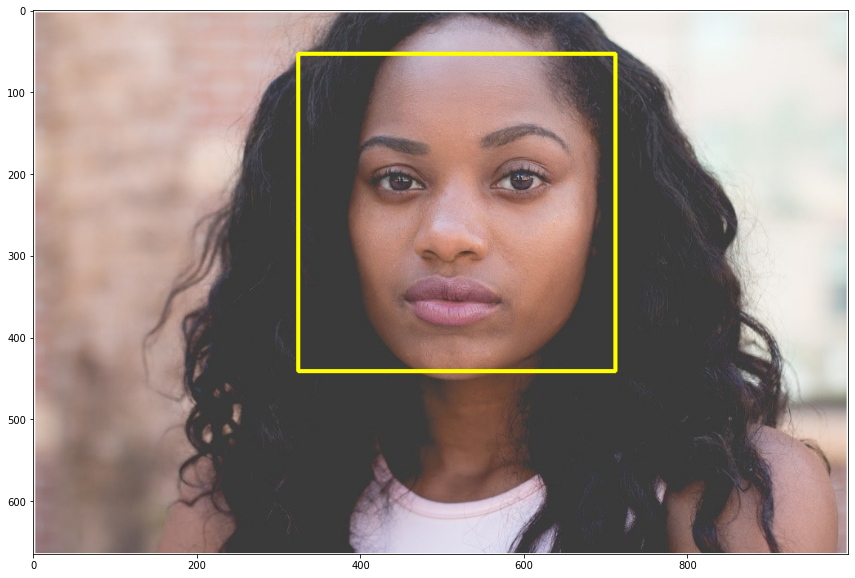

In [8]:
faces3 = detecFaces('../resources/pics/Exercise_Aula1_pic3.png', 1.3, 5)

plt.figure(figsize=(15,10))
drawRect('../resources/pics/Exercise_Aula1_pic3.png', faces3)

saveFaces('../resources/pics/Exercise_Aula1_pic3.png', faces3, 3)